# Force Clamp - Kinesin Attached to a Bead Walking on Microtubule

In this assay we had microtubules on the surface. We trapped beads with Kinesin (molecular motor) and had ATP inside the assay. As we lowered the kinesin-coated beads on top of a microtubule, it attached to it and started stepping on the microtubule. Kinesins were pulling the bead out of the center of the trap and thus increasing the force on the bead.

At a certain (set) force, we turn the force clamp on and the nanostage moves towards the motion of the bead. Now the force stays constant, and we get an idea of how the motor steps by looking at the motion of the nanostage.


In [1]:
"""  Install Pylake, in case it's not installed """
# !pip install lumicks.pylake

"  Install Pylake, in case it's not installed "

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from lumicks import pylake

In [7]:
""" Open the file """

filename = r'20190215-142512 Marker force clamp.h5';
data = pylake.File(filename)

In [8]:
""" Look at the contents of the file """

print(data)

File root metadata:
- Bluelake version: Unknown
- Description: 
- Experiment: 
- GUID: {E77F9E67-182F-4BB5-ABB0-14CDB9068600}
- Export time (ns): 1550237112593852547
- File format version: 2

Bead diameter:
  Template 1:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 964
  Template 2:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 964
Calibration:
  9:
    Force 1x
    Force 1y
    JSON:
    - Data type: object
    - Size: 1
Diagnostics:
  Nano X:
  - Data type: float64
  - Size: 1943676
  Nano Y:
  - Data type: float64
  - Size: 1943676
  Nano Z:
  - Data type: float64
  - Size: 1943676
Force HF:
  Force 1x:
  - Data type: float64
  - Size: 1943676
  Force 1y:
  - Data type: float64
  - Size: 1943676
Force LF:
  Force 1x:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 964
  Force 1y:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 964
  Trap 1:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 9

In [84]:
""" Load the data """

# Force in the y direction (pN)
forcey = data['Force HF']['Force 1y']['6s':'8.5s']
# Nanostage position in the y direction (V)
nanoy = data['Diagnostics']['Nano Y']['6s':'8.5s']
# time traces (seconds)
time = forcey.timestamps/1e9
time = time - time[0]

sample_rate = data['Diagnostics']['Nano Y'].sample_rate


In [85]:
""" Downsample the data """

downsampled_rate = 100 # Hz

# downsample the force, nanostage position and time
forcey_downsamp = forcey.downsampled_by(int(sample_rate/downsampled_rate))
nanoy_downsamp = nanoy.downsampled_by(int(sample_rate/downsampled_rate))
time_downsamp = forcey_downsamp.timestamps/1e9
time_downsamp = time_downsamp - time_downsamp[0]


In [15]:
""" Conversion factor for the nanostage """

# this is determined for each nanostage and it has 3 different conversion factors for the 3 directions (x,y,z)
conv_fact = 50000/(1.849-0.04933) #nm/V

### Force versus Time

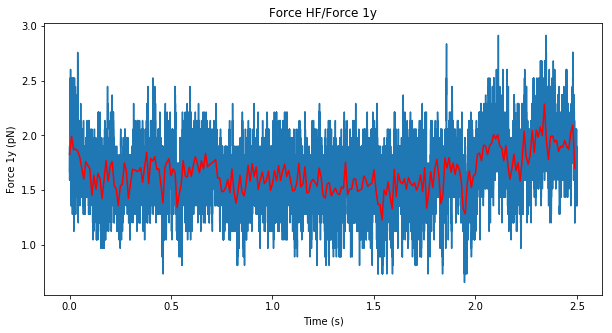

In [93]:
fig = plt.figure(figsize=(10,5))

forcey.plot()
forcey_downsamp.plot(color='r')
plt.ylabel('Force 1y (pN)')

plt.savefig("../../docs/examples_by_segments/cytoskeletal_kinesin_bead_closed_loop_fig1.png")

In [90]:
print('Mean force is: '+str(np.mean(forcey_downsamp.data)) + ' pN' )
print('Variation in the force is: '+str(np.std(forcey_downsamp.data)) + ' pN' )

Mean force is: 1.6587699919874592 pN
Variation in the force is: 0.17120278599815678 pN


Here we see that the force stay at 1.7 pN and stays relatively constant

### Nanostage Position versus Time

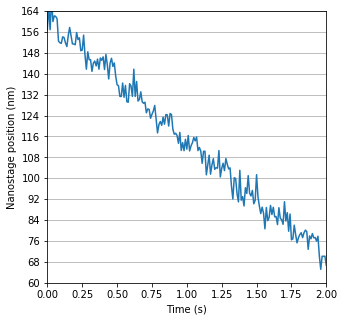

In [94]:
fig = plt.figure(figsize=(5,5))

# plot position versus time
ax = plt.subplot(1,1,1)
plt.plot(time_downsamp, nanoy_downsamp.data*conv_fact-2000)

plt.xlim([0, 2])
plt.ylim([60, 160])

# create y-ticks for axis
lims2=[]
for i in range(14):
    lims2.append(i*8+60)
ax.set_yticks(lims2)

# add grid to the graph
ax.yaxis.grid()

# label axis
ax.set_xlabel('Time (s)')
plt.ylabel('Nanostage position (nm)')

plt.savefig("../../docs/examples_by_segments/cytoskeletal_kinesin_bead_closed_loop_fig2.png")

Here we observe the motion of the nanostage as it follows the motion of the bead. We can see steps in the nanostage signal which correspond to individual kinesin molecules stepping and pulling the bead.